In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
data=pd.read_csv('HousingData.csv')

In [23]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
data.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [27]:
data['CRIM']=data['CRIM'].fillna(data['CRIM'].median())
data['ZN']=data['ZN'].fillna(data['ZN'].mean())
data['INDUS']=data['INDUS'].fillna(data['INDUS'].mean())
data['CHAS']=data['CHAS'].fillna(data['CHAS'].mean())
data['AGE']=data['AGE'].fillna(data['AGE'].mean())
data['LSTAT']=data['LSTAT'].fillna(data['LSTAT'].mean())

In [28]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [29]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


{'whiskers': [<matplotlib.lines.Line2D at 0x175a7921dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x175a792f3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a7921a90>],
 'medians': [<matplotlib.lines.Line2D at 0x175a792f940>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a792fc10>],
 'means': []}

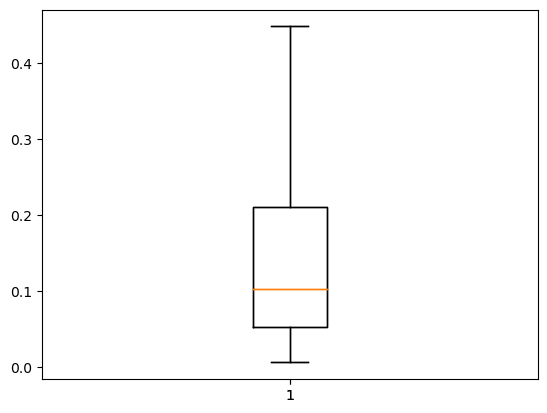

In [55]:
#plt.hist(data['CRIM'])
plt.boxplot(data['CRIM'])
q1=data['CRIM'].quantile(0.25)
q3=data['CRIM'].quantile(0.75)
IQR=q3-q1
data=data[(data['CRIM']<(q3+IQR)) | (data['CRIM']>(q1-IQR))]
plt.boxplot(data['CRIM'])


{'whiskers': [<matplotlib.lines.Line2D at 0x175a77c5dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x175a77c5670>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a77c5c10>],
 'medians': [<matplotlib.lines.Line2D at 0x175a77abd90>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a77ab130>],
 'means': []}

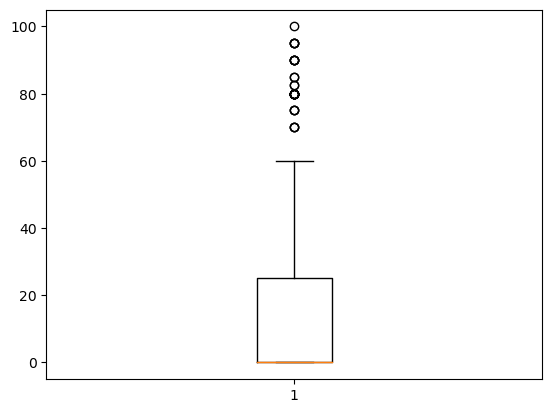

In [60]:
#plt.hist(data['ZN'])
q1=data['ZN'].quantile(0.25)
q3=data['ZN'].quantile(0.75)
IQR=q3-q1
data=data[(data['ZN']<(q3+IQR)) | (data['ZN']>(q1-IQR))]
plt.boxplot(data['ZN'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175a767f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x175a7557a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a767f6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x175a7557eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a7557460>],
 'means': []}

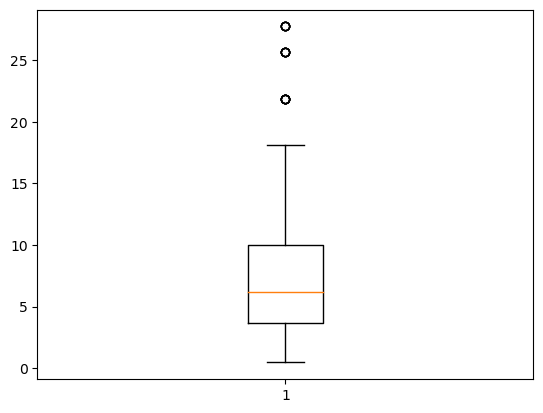

In [62]:
#plt.hist(data['INDUS'])
q1=data['INDUS'].quantile(0.25)
q3=data['INDUS'].quantile(0.75)
IQR=q3-q1
data=data[(data['INDUS']<(q3+IQR)) | (data['INDUS']>(q1-IQR))]
plt.boxplot(data['INDUS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175a75dcd30>,
 'caps': [<matplotlib.lines.Line2D at 0x175a75d0310>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a75dca30>],
 'medians': [<matplotlib.lines.Line2D at 0x175a75d08b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a75d0b80>],
 'means': []}

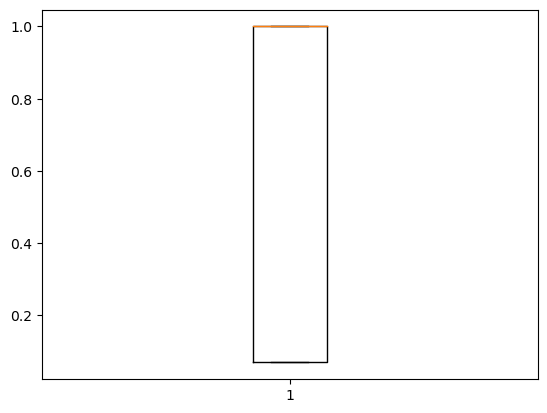

In [64]:
#plt.hist(data['CHAS'])
q1=data['CHAS'].quantile(0.25)
q3=data['CHAS'].quantile(0.75)
IQR=q3-q1
data=data[(data['CHAS']<(q3+IQR)) | (data['CHAS']>(q1-IQR))]
plt.boxplot(data['CHAS'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175a757de50>,
 'caps': [<matplotlib.lines.Line2D at 0x175a758c430>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a757db80>],
 'medians': [<matplotlib.lines.Line2D at 0x175a758c9d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a758cca0>],
 'means': []}

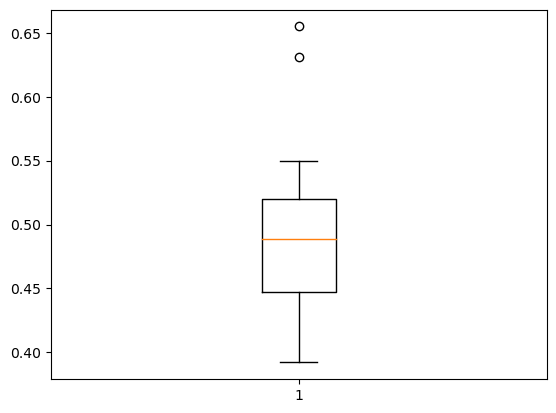

In [66]:
#plt.hist(data['NOX'])
q1=data['NOX'].quantile(0.25)
q3=data['NOX'].quantile(0.75)
IQR=q3-q1
data=data[(data['NOX']<(q3+IQR)) | (data['NOX']>(q1-IQR))]
plt.boxplot(data['NOX'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175a8bb78b0>,
 'caps': [<matplotlib.lines.Line2D at 0x175a8bb7e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a8bb75e0>],
 'medians': [<matplotlib.lines.Line2D at 0x175a8bc5430>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a8bc5700>],
 'means': []}

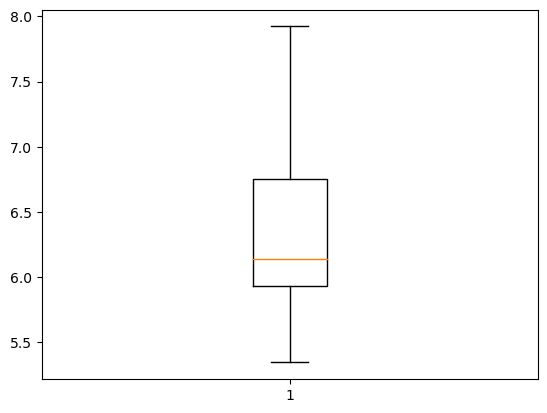

In [68]:
#plt.hist(data['RM'])
q1=data['RM'].quantile(0.25)
q3=data['RM'].quantile(0.75)
IQR=q3-q1
data=data[(data['RM']<(q3+IQR)) | (data['RM']>(q1-IQR))]
plt.boxplot(data['RM'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175a8c8f9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x175a8c8feb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a8c8f730>],
 'medians': [<matplotlib.lines.Line2D at 0x175a8c9e460>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a8c9e730>],
 'means': []}

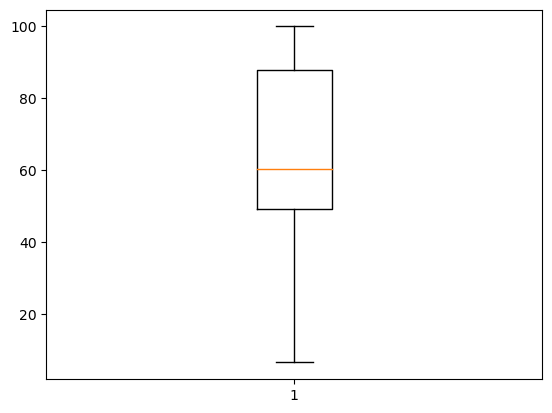

In [70]:
#plt.hist(data['AGE'])
q1=data['AGE'].quantile(0.25)
q3=data['AGE'].quantile(0.75)
IQR=q3-q1
data=data[(data['AGE']<(q3+IQR)) | (data['AGE']>(q1-IQR))]
plt.boxplot(data['AGE'])

{'whiskers': [<matplotlib.lines.Line2D at 0x175a8cb4430>,
 'caps': [<matplotlib.lines.Line2D at 0x175a8cb49d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x175a8cb4130>],
 'medians': [<matplotlib.lines.Line2D at 0x175a8cb4f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x175a8cc2280>],
 'means': []}

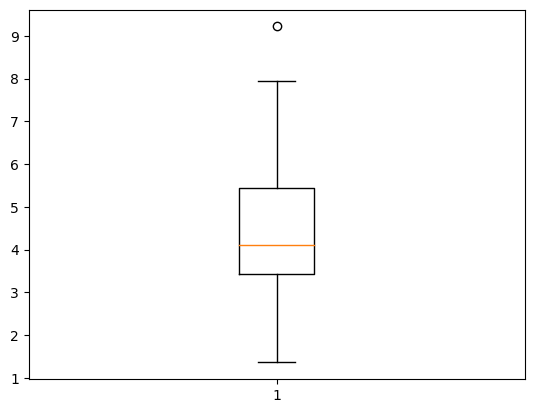

In [71]:
#plt.hist(data['DIS'])
q1=data['DIS'].quantile(0.25)
q3=data['DIS'].quantile(0.75)
IQR=q3-q1
data=data[(data['DIS']<(q3+IQR)) | (data['DIS']>(q1-IQR))]
plt.boxplot(data['DIS'])

In [72]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.538027,0.169135,0.191683,0.333478,-0.256531,0.559837,-0.404586,0.333983,0.248481,0.481274,-0.259356,0.445690,-0.217381
ZN,-0.538027,1.000000,-0.617248,-0.033547,-0.639807,0.492696,-0.533894,0.622069,-0.354437,-0.281112,-0.434089,0.188954,-0.455727,0.417084
INDUS,0.169135,-0.617248,1.000000,-0.104194,0.743946,-0.571792,0.375972,-0.497106,0.616808,0.660790,0.549607,-0.332614,0.348318,-0.258324
CHAS,0.191683,-0.033547,-0.104194,1.000000,0.046999,0.310760,0.299532,-0.547102,-0.068985,-0.269115,0.070703,0.094881,-0.028330,0.410294
NOX,0.333478,-0.639807,0.743946,0.046999,1.000000,-0.331501,0.522903,-0.715173,0.774033,0.754871,0.382401,-0.532847,0.216207,-0.110472
RM,-0.256531,0.492696,-0.571792,0.310760,-0.331501,1.000000,-0.362473,0.073930,-0.084432,-0.250839,-0.382067,-0.026267,-0.782109,0.809853
AGE,0.559837,-0.533894,0.375972,0.299532,0.522903,-0.362473,1.000000,-0.470840,0.282150,0.246924,0.206418,0.023190,0.554929,-0.258616
DIS,-0.404586,0.622069,-0.497106,-0.547102,-0.715173,0.073930,-0.470840,1.000000,-0.465869,-0.354103,-0.404255,0.209755,-0.134866,-0.112805
RAD,0.333983,-0.354437,0.616808,-0.068985,0.774033,-0.084432,0.282150,-0.465869,1.000000,0.933225,0.498146,-0.739380,-0.052684,0.165417
TAX,0.248481,-0.281112,0.660790,-0.269115,0.754871,-0.250839,0.246924,-0.354103,0.933225,1.000000,0.498050,-0.663347,0.006477,0.026502


<AxesSubplot:>

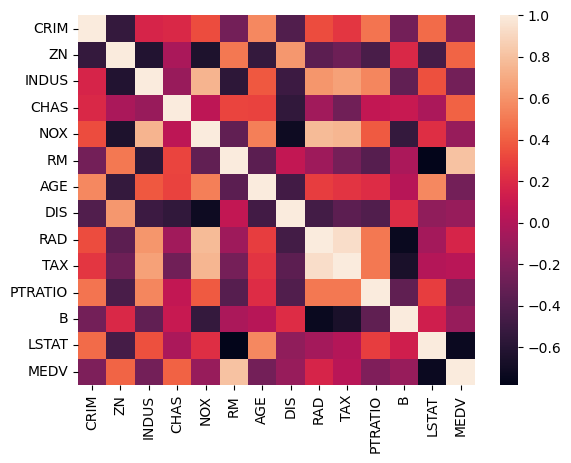

In [73]:
import seaborn as sns
sns.heatmap(data.corr())

In [75]:
X=data[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']]

In [76]:
Y=data[['MEDV']]

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [81]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=2,train_size=0.8)

In [82]:
lr=LinearRegression()

In [83]:
lr.fit(x_train,y_train)

LinearRegression()

In [85]:
y_pred=lr.predict(x_test)

In [86]:
from sklearn.metrics import r2_score

In [87]:
r2=r2_score(y_test,y_pred)

In [88]:
r2

-0.003818421984301601

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
dtr=DecisionTreeRegressor()

In [96]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [97]:
y_pred=dtr.predict(x_test)

In [98]:
r2=r2_score(y_test,y_pred)

In [99]:
r2

-0.7460041273823497

In [101]:
## Got the r2 score of -0.74 using decision tree